<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descendants-from-head-notebook" data-toc-modified-id="Descendants-from-head-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descendants from head notebook</a></span></li><li><span><a href="#Two-factors-effect" data-toc-modified-id="Two-factors-effect-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Two factors effect</a></span><ul class="toc-item"><li><span><a href="#$r_p$-&amp;-$K_p$" data-toc-modified-id="$r_p$-&amp;-$K_p$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>$r_p$ &amp; $K_p$</a></span></li><li><span><a href="#$r_p$-&amp;-$J_p$" data-toc-modified-id="$r_p$-&amp;-$J_p$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>$r_p$ &amp; $J_p$</a></span></li><li><span><a href="#$r_p$-&amp;-$T_p$" data-toc-modified-id="$r_p$-&amp;-$T_p$-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>$r_p$ &amp; $T_p$</a></span></li><li><span><a href="#$r_p$-&amp;-$T_k$" data-toc-modified-id="$r_p$-&amp;-$T_k$-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>$r_p$ &amp; $T_k$</a></span></li><li><span><a href="#$K_p$-&amp;-$J_p$" data-toc-modified-id="$K_p$-&amp;-$J_p$-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>$K_p$ &amp; $J_p$</a></span></li><li><span><a href="#$K_p$-&amp;-$T_p$" data-toc-modified-id="$K_p$-&amp;-$T_p$-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>$K_p$ &amp; $T_p$</a></span></li><li><span><a href="#$K_p$-&amp;-$T_k$" data-toc-modified-id="$K_p$-&amp;-$T_k$-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>$K_p$ &amp; $T_k$</a></span></li><li><span><a href="#$J_p$-&amp;-$T_p$" data-toc-modified-id="$J_p$-&amp;-$T_p$-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>$J_p$ &amp; $T_p$</a></span></li><li><span><a href="#$J_p$-&amp;-$T_k$" data-toc-modified-id="$J_p$-&amp;-$T_k$-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>$J_p$ &amp; $T_k$</a></span></li><li><span><a href="#$T_p$-&amp;-$T_k$" data-toc-modified-id="$T_p$-&amp;-$T_k$-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>$T_p$ &amp; $T_k$</a></span></li></ul></li></ul></div>

# Descendants from head notebook

In [1]:
using RCall, PyCall, Plots, ProgressMeter, DataFrames
mt = pyimport("math") #??
sc = pyimport("scipy")
itg = pyimport("scipy.integrate")

PyObject <module 'scipy.integrate' from '/Users/Ho_Pok_Man/.julia/conda/3/lib/python3.7/site-packages/scipy/integrate/__init__.py'>

In [2]:
function ebc_LVc(pops, t, rp, rq, Jp, Jq, Kp, Kq, Tp, Tq, Tk)
    
    p = pops[:1]
    q = pops[:2]
    
    hpq = (Jq-Tk*Tq)*q/(Jp*p+Jq*q-Tk*(Tp*p+Tq*q))
    hqp = (Jp-Tk*Tp)*p/(Jp*p+Jq*q-Tk*(Tp*p+Tq*q))
    
    dpdt = rp*p*(1-(p+hpq*q)/Kp)
    dqdt = rq*q*(1-(q+hqp*p)/Kq)

    return (dpdt, dqdt)
end

ebc_LVc (generic function with 1 method)

In [3]:
## rime series dt
t=sc.linspace(0,7,10000)

## default parameters
rp = rq = 1
Kp = Kq = 200
Jp = Jq = 50
Tp = Tq = 10
Tk = 10

## test parameters dump
gRate = [2, 1.5, 1.3, 1.1, 1.05, .95, .8, .6, .4, .05]
cCapa = [300, 250, 220, 210, 205, 195, 190, 180, 150, 100]
eGain = [54, 52, 51, 50.5, 50.1, 49.9, 49.5, 49, 48, 46]
cSize = [15, 14, 13, 12, 11, 9, 8, 7, 6, 5]
tLost = [15, 14, 13, 12, 11, 9, 8, 7, 6, 5]

println() # prevent print unnecessary output

# Two factors effect

First graph: same trend - factors increase / decrease together  
Second graph: opposite trend - one factor increase, the other decrease

## $r_p$ & $K_p$

In [4]:
## prep para test series
test1=gRate
test2=cCapa
println() # prevent print unnecessary output

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rkP.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rkP.gif")
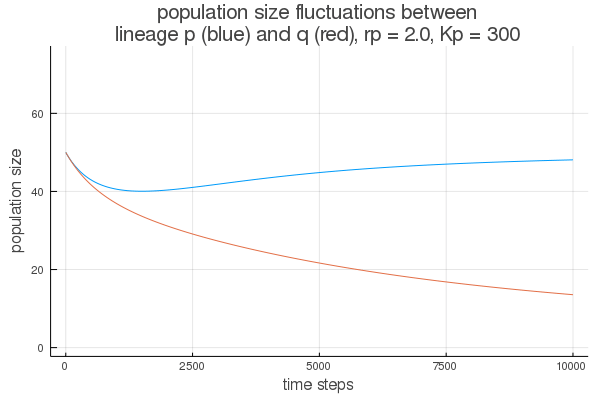

In [5]:
#test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    rp = test1[i]
    Kp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), rp = "*string(test1[i])*", Kp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_rkP.gif", fps=1)

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rkN.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rkN.gif")
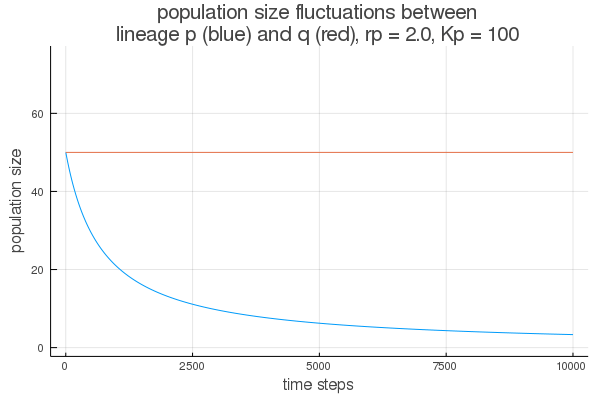

In [6]:
test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    rp = test1[i]
    Kp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), rp = "*string(test1[i])*", Kp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_rkN.gif", fps=1)

## $r_p$ & $J_p$

In [7]:
## prep para test series
test1=gRate
test2=eGain
println() # prevent print unnecessary output

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rjP.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rjP.gif")
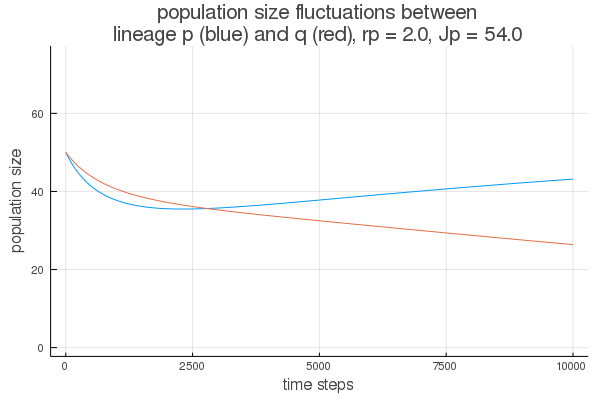

In [8]:
#test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    rp = test1[i]
    Jp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), rp = "*string(test1[i])*", Jp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_rjP.gif", fps=1)

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rjN.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rjN.gif")
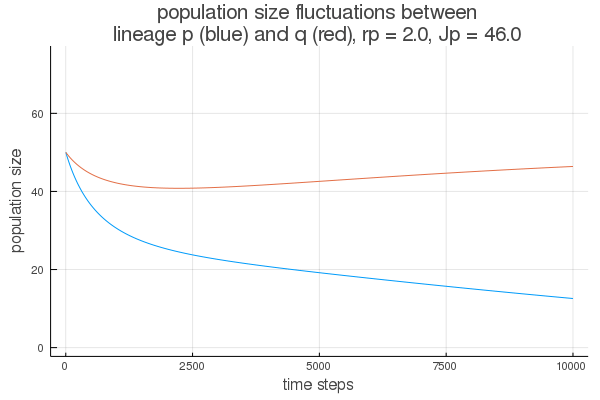

In [9]:
test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    rp = test1[i]
    Jp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), rp = "*string(test1[i])*", Jp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_rjN.gif", fps=1)

## $r_p$ & $T_p$

In [10]:
## prep para test series
test1=gRate
test2=cSize
println() # prevent print unnecessary output

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rtP.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rtP.gif")
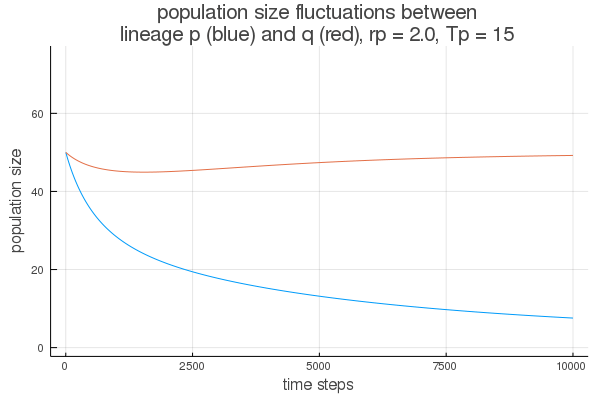

In [11]:
#test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    rp = test1[i]
    Tp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), rp = "*string(test1[i])*", Tp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_rtP.gif", fps=1)

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rtN.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rtN.gif")
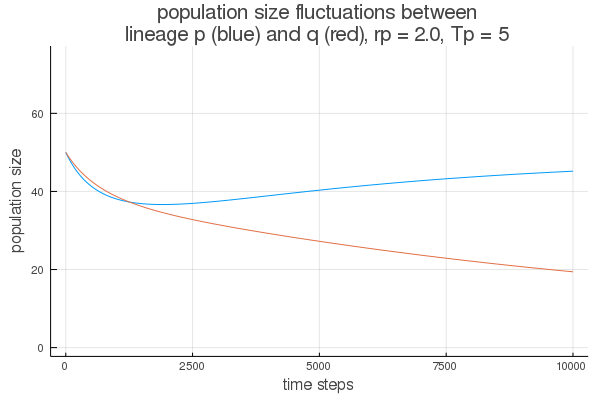

In [12]:
test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    rp = test1[i]
    Tp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), rp = "*string(test1[i])*", Tp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_rtN.gif", fps=1)

## $r_p$ & $T_k$

In [13]:
## prep para test series
test1=gRate
test2=tLost
println() # prevent print unnecessary output

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rTP.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rTP.gif")
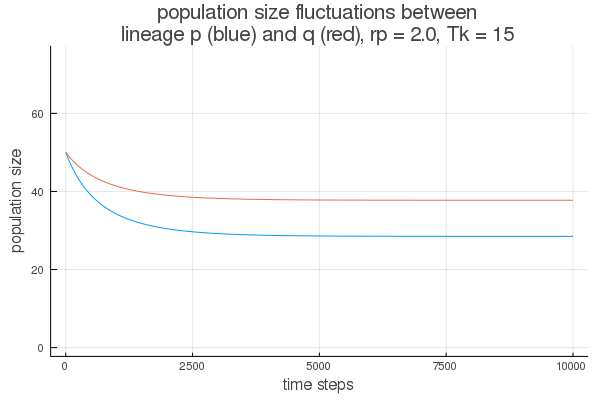

In [14]:
#test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    rp = test1[i]
    Tk = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), rp = "*string(test1[i])*", Tk = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_rTP.gif", fps=1)

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rTP.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rTP.gif")
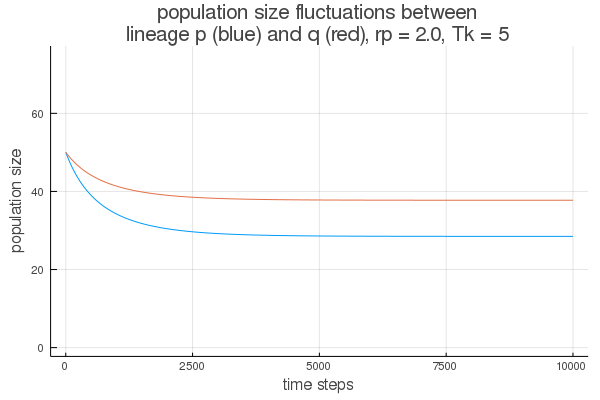

In [15]:
test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    rp = test1[i]
    Tk = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), rp = "*string(test1[i])*", Tk = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_rTP.gif", fps=1)

## $K_p$ & $J_p$

In [16]:
## prep para test series
test1=cCapa
test2=eGain
println() # prevent print unnecessary output

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_kjP.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_kjP.gif")
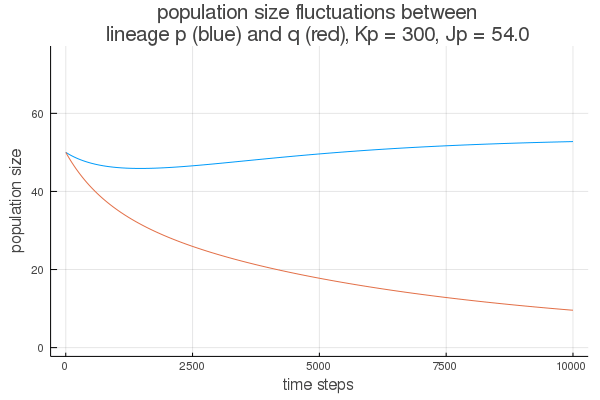

In [17]:
#test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    Kp = test1[i]
    Jp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Kp = "*string(test1[i])*", Jp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_kjP.gif", fps=1)

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_kjN.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_kjN.gif")
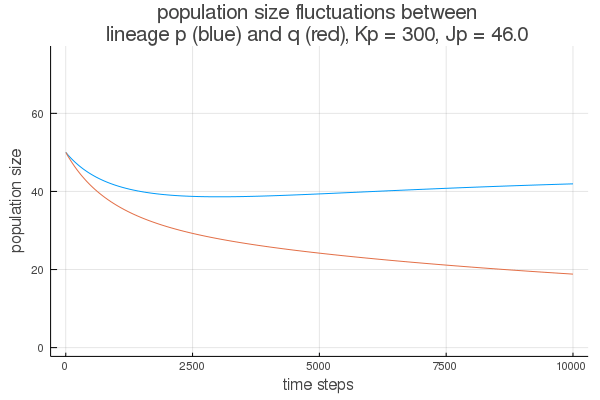

In [18]:
test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    Kp = test1[i]
    Jp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Kp = "*string(test1[i])*", Jp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_kjN.gif", fps=1)

## $K_p$ & $T_p$

In [19]:
## prep para test series
test1=cCapa
test2=cSize
println() # prevent print unnecessary output

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_ktP.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_ktP.gif")
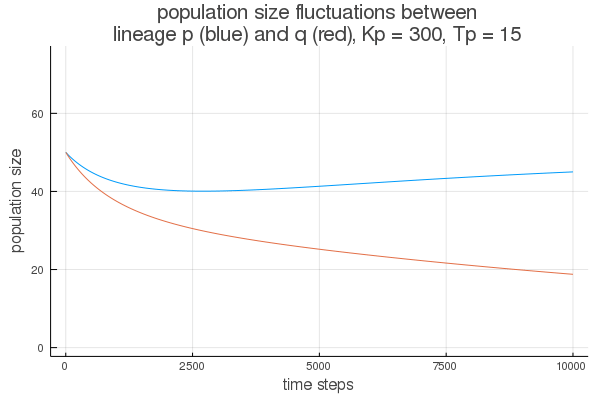

In [20]:
#test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    Kp = test1[i]
    Tp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Kp = "*string(test1[i])*", Tp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_ktP.gif", fps=1)

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_ktN.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_ktN.gif")
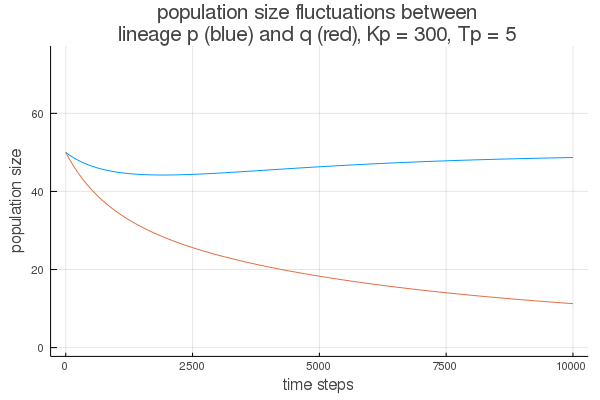

In [21]:
test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    Kp = test1[i]
    Tp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Kp = "*string(test1[i])*", Tp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_ktN.gif", fps=1)

## $K_p$ & $T_k$

In [22]:
## prep para test series
test1=cCapa
test2=tLost
println() # prevent print unnecessary output

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_kTP.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_kTP.gif")
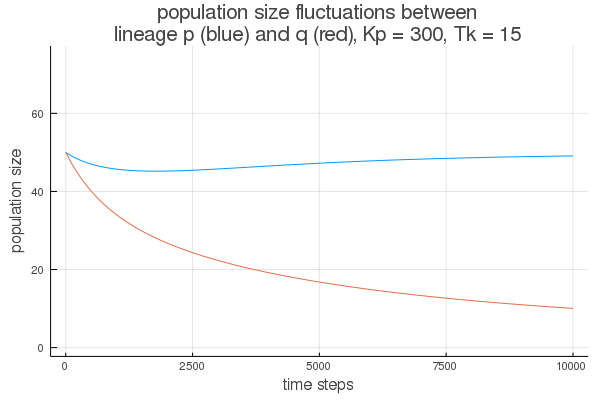

In [23]:
#test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    Kp = test1[i]
    Tk = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Kp = "*string(test1[i])*", Tk = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_kTP.gif", fps=1)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.0000000000000D+00   r2 =  0.0000000000000D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.7000700070007D-03
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.0000000000000D+00   r2 =  0.0000000000000D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.1400140014001D-02
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.0000000000000D+00   r2 =  0.0000000000000D+00
 lsoda--  trouble from intdy. itask = i1, tout = r1  
      in above message,  i1 =         1
      in above message,  r1 =  0.1400140014001D-02


┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_kTN.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_kTN.gif")
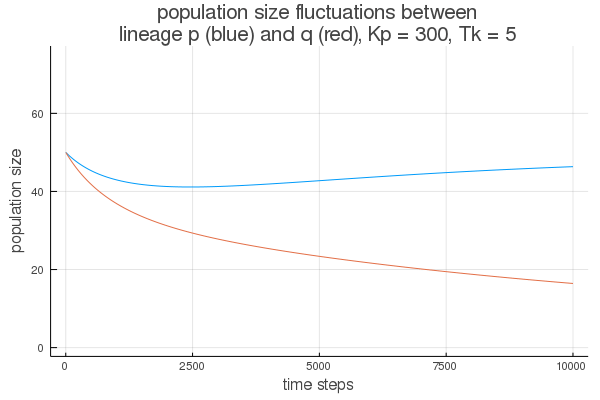

In [24]:
test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    Kp = test1[i]
    Tk = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Kp = "*string(test1[i])*", Tk = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_kTN.gif", fps=1)

## $J_p$ & $T_p$

In [25]:
## prep para test series
test1=eGain
test2=cSize
println() # prevent print unnecessary output

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_jtP.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_jtP.gif")
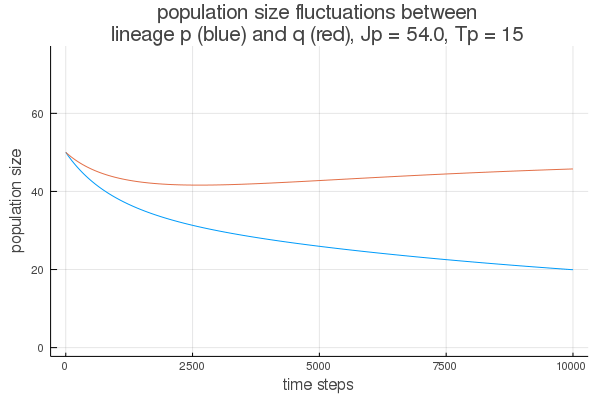

In [26]:
#test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    Jp = test1[i]
    Tp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Jp = "*string(test1[i])*", Tp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_jtP.gif", fps=1)

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_jtN.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_jtN.gif")
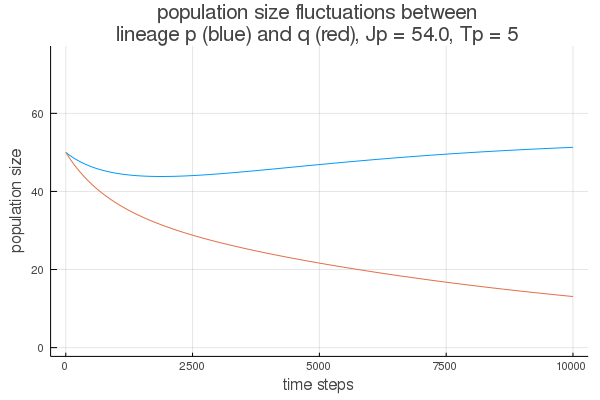

In [27]:
test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    Jp = test1[i]
    Tp = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Jp = "*string(test1[i])*", Tp = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_jtN.gif", fps=1)

## $J_p$ & $T_k$

In [28]:
## prep para test series
test1=eGain
test2=tLost
println() # prevent print unnecessary output

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_jTP.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_jTP.gif")
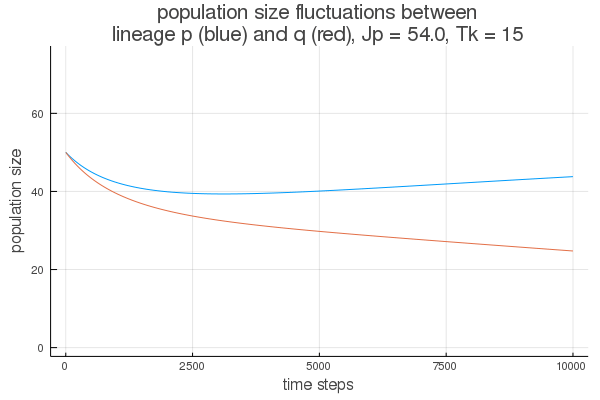

In [29]:
#test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    Jp = test1[i]
    Tk = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Jp = "*string(test1[i])*", Tk = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_jTP.gif", fps=1)

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_jTN.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_jTN.gif")
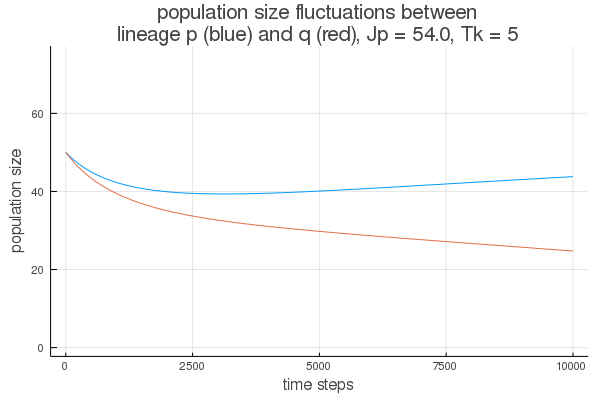

In [30]:
test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    Jp = test1[i]
    Tk = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Jp = "*string(test1[i])*", Tk = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_jTN.gif", fps=1)

## $T_p$ & $T_k$

In [31]:
## prep para test series
test1=cSize
test2=tLost
println() # prevent print unnecessary output

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_tTP.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_tTP.gif")
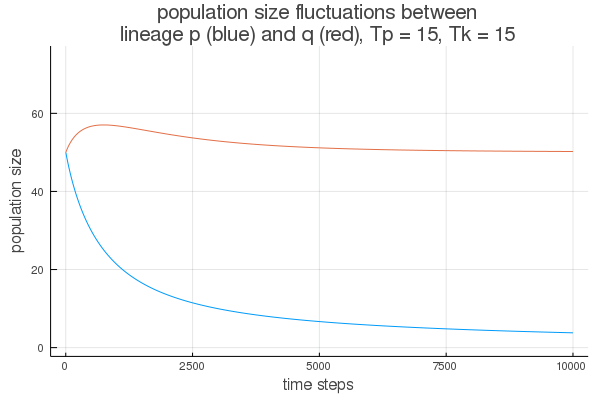

In [32]:
#test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    Tp = test1[i]
    Tk = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Tp = "*string(test1[i])*", Tk = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_tTP.gif", fps=1)

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_tTN.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_tTN.gif")
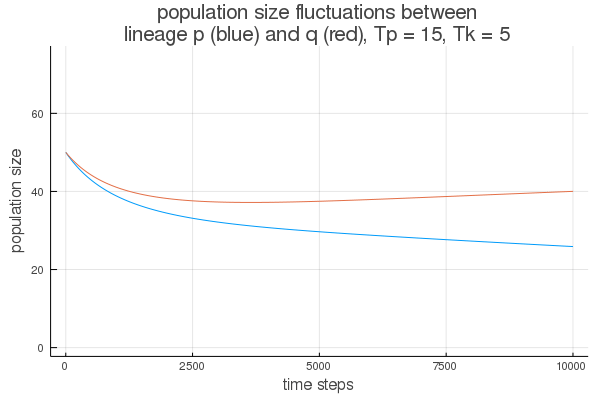

In [33]:
test2=reverse(test2)

aa = @animate for i in 1:length(test1)
    Tp = test1[i]
    Tk = test2[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Tp = "*string(test1[i])*", Tk = "*string(test2[i]), label="", ylim=[0, 75])

end
gif(aa, "simResult/sim_tTN.gif", fps=1)